**OpenViSUS: read from a remote dataset**

To execute this notebook

python3 -m pip install numpy matplotlib OpenVisus



In [1]:
import os,sys
import math
import matplotlib.pyplot as plt
import numpy
import ipywidgets 

def ShowData(data):
    fig = plt.figure(figsize = (70,20))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(data, origin='lower')
    plt.show()

In [2]:
sys.path.append(r"D:\projects\OpenVisus\build\RelWithDebInfo")
from OpenVisus import *


In [3]:
db=LoadDataset("http://atlantis.sci.utah.edu/mod_visus?dataset=BlueMarble")
print(db.getDatasetBody().toString())

# in 2D this means more or less a 2048x1024 image in power-2 logic box 
max_resolution=21


<dataset url="http://atlantis.sci.utah.edu/mod_visus?dataset=BlueMarble" typename="IdxDataset">
	<idxfile>
		<version value="6" />
		<bitmask value="V001010101010101010101010101010101" />
		<box value="0 86400 0 43200" />
		<bitsperblock value="16" />
		<blocksperfile value="256" />
		<block_interleaving value="0" />
		<filename_template value="/usr/sci/cedmav/data/climate/bluemarble_nextgen/bluemarble-compressed/%02x/%04x.bin" />
		<time_template value="time%02d/" />
		<physic_box value="0 5760 0 2881" />
		<field name="data" description="" index="" default_compression="zip" default_layout="1" default_value="0" filter="" dtype="uint8[3]" />
		<timestep from="0" to="11" step="1" />
	</idxfile>
</dataset>


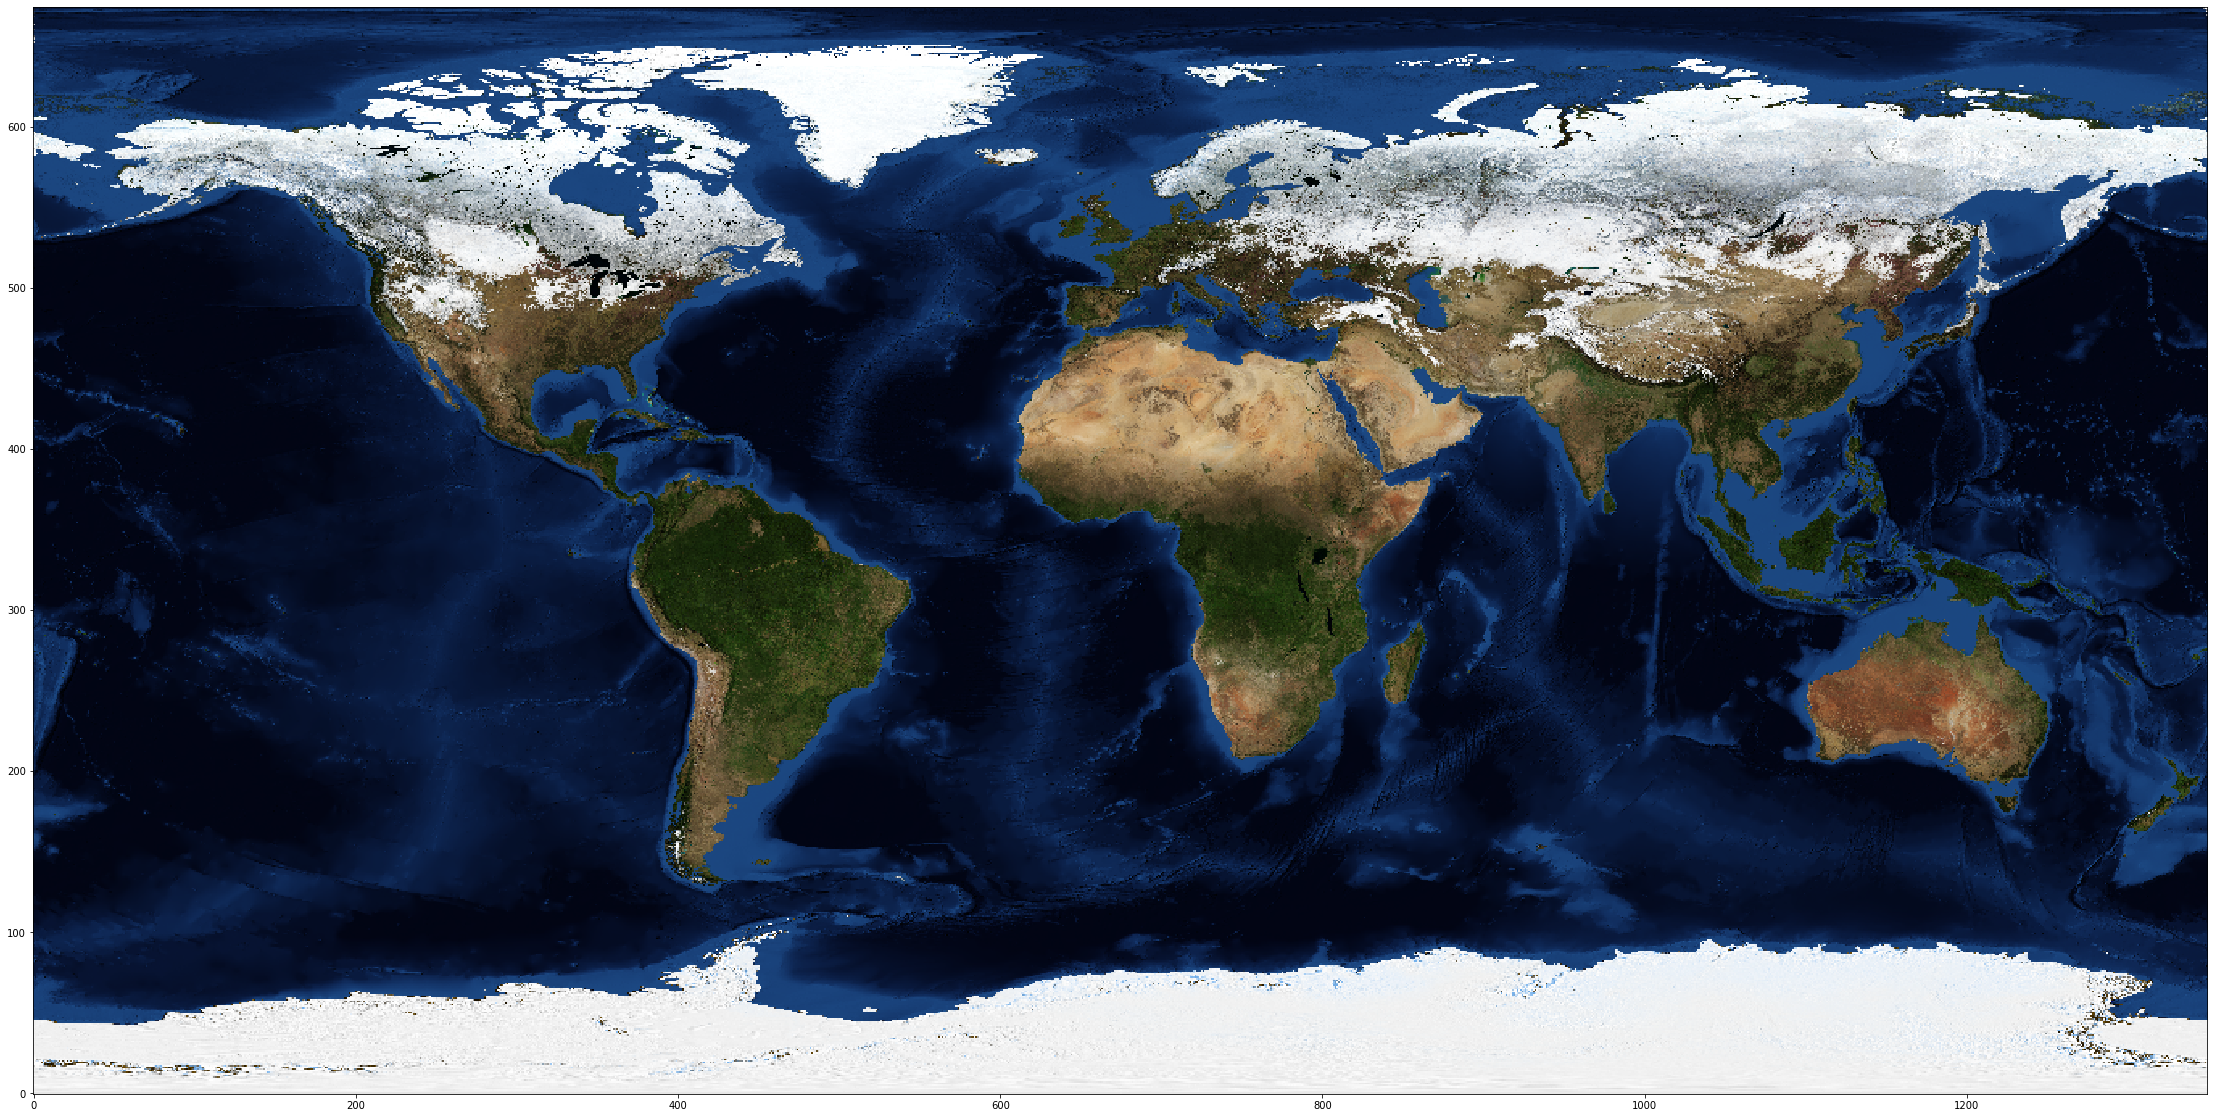

In [4]:
logic_box=db.getLogicBox()
data=db.read(time=0,max_resolution=max_resolution)
ShowData(data)

In [5]:
def RefreshAll(time,num_refinements=3):
    for data in db.read(logic_box=logic_box, time=time,max_resolution=max_resolution,num_refinements=num_refinements):
        ShowData(data)

ipywidgets.interact(
    RefreshAll,
    time=ipywidgets.widgets.IntSlider(value=0,min=0,max=4,step=1), 
    resolution=ipywidgets.widgets.IntSlider(value=9,min=1,max=db.getMaxResolution(),step=2))

interactive(children=(IntSlider(value=0, description='time', max=4), IntSlider(value=3, description='num_refin…

<function __main__.RefreshAll(time, num_refinements=3)>